In [1]:
import gzip
import pickle
import os.path as op

from nilearn import image, plotting
from matplotlib import pyplot as plt

# Neurosynth

## Term-based Meta-Analysis

In [2]:

dataset = "neurosynth"
data_dir = op.abspath("../data")
output_dir = op.join(data_dir, "meta-analysis")
term_based_decoder_fn = op.join(output_dir, f"term-based_{dataset}_decoder.pkl.gz")
decoder_file = gzip.open(term_based_decoder_fn, "rb")
decoder = pickle.load(decoder_file)
term_based_meta_maps = decoder.images_
features = [f.split("__")[-1] for f in decoder.features_]

In [26]:
meta_maps_imgs = decoder.masker.inverse_transform(term_based_meta_maps[60:71,:])
features_to_plot = features[60:71]

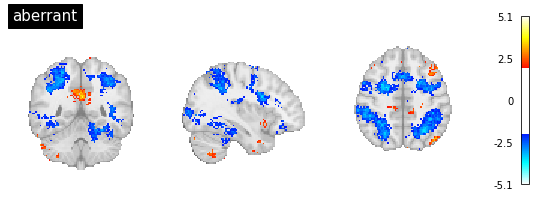

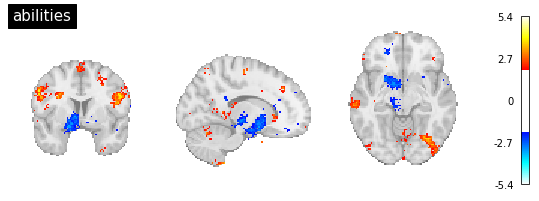

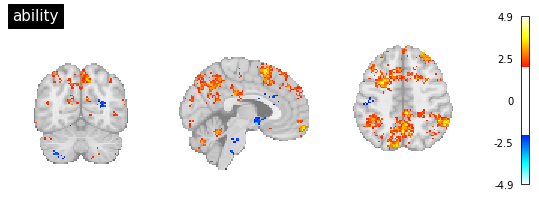

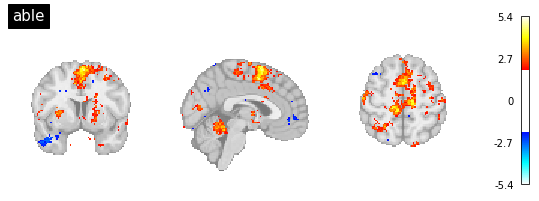

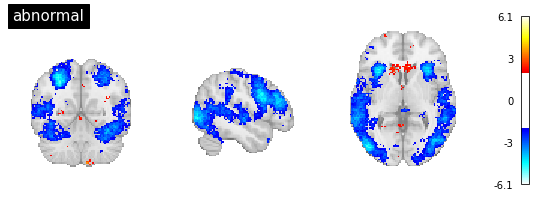

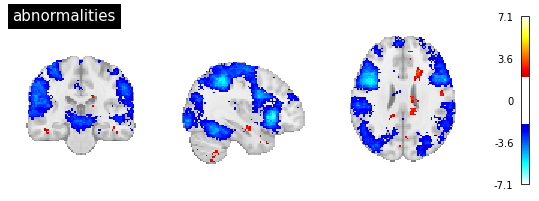

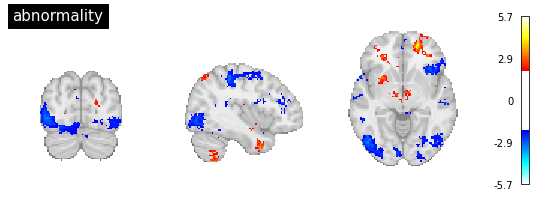

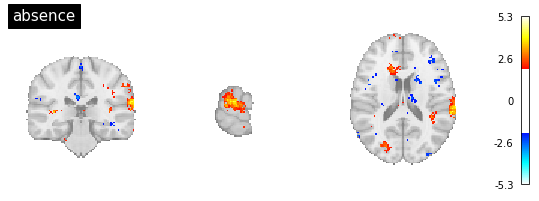

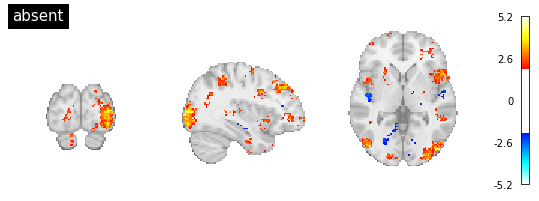

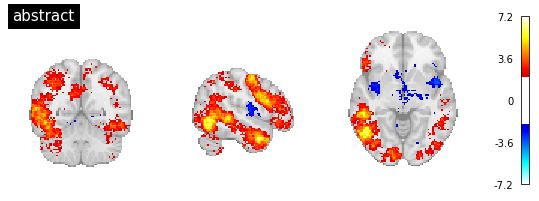

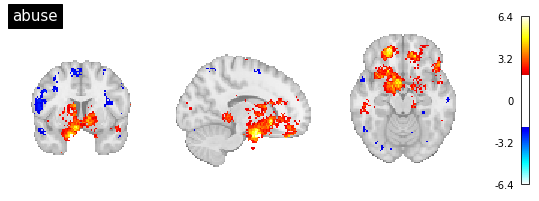

In [27]:
for i_feature in range(11):
    feature_img_3d = image.index_img(meta_maps_imgs, i_feature)
    plotting.plot_stat_map(
        feature_img_3d,
        draw_cross=False,
        colorbar=True,
        annotate=False,
        threshold=2,
        title=features_to_plot[i_feature],
    )
    plt.show()